Now with my code explained in my final_project_draft.ipynb, this is going to be a file usable for everyone.

In [22]:
import numpy as np
import pandas as pd
import datetime
import seaborn as sns
import glob     #As Spotify delivers different amount of files for every person, glob will help looking for those files
from matplotlib import pyplot as plt
from IPython.display import display

In [2]:
files = glob.glob('StreamingHistory*.json')
spotify_dataset = []
for dataset in files:
    spotify_df = pd.read_json(dataset)
    spotify_dataset.append(spotify_df)

In [3]:
#First step was merging all the files given by Spotify in a single dataset, that is why the function .concat
clean_spotify = pd.concat(spotify_dataset)

In [4]:
#These are new columns in the dataset that are going to be useful for visualizations later in the code

clean_spotify['minutes'] = clean_spotify['msPlayed'] / 60000          #converts ms in minutes
clean_spotify['endTime'] = pd.to_datetime(clean_spotify['endTime'])   #This converts the column in datatime.
clean_spotify['Month'] = clean_spotify['endTime'].dt.month_name()     #This will get the month of the endTime column
clean_spotify['Num_month'] = clean_spotify['endTime'].dt.month        #And this will arrange that month by its number
clean_spotify['hour'] = clean_spotify['endTime'].dt.tz_localize('UTC').dt.tz_convert('America/New_York')              #Gets the endTime in UTC hours
clean_spotify['local_hour'] = clean_spotify['hour'].dt.hour           #Noticed time was in UTC after getting a suspicius Hist, got to convert it to EST.
clean_spotify['day'] = clean_spotify['hour'].dt.day_name()            #Created a variable for days names
clean_spotify['num_day'] = clean_spotify['hour'].dt.dayofweek         #Created a variable for days indexs

#This function will complemenet the histogram about the listening habits.
def get_time_of_day(h):
  if 5 <= h < 8: return "Early Morning (5 am - 8 am)"
  elif 8 <= h < 12: return 'Morning (8 am - 12 pm)'
  elif 12 <= h < 15: return 'Afternoon (12 pm - 15 pm)'
  elif 15 <= h < 18: return "Evening (15 pm - 18 pm)"
  elif 18 <= h < 23: return 'Night (18 pm - 23 pm)'
  else: return 'Late Night ( 0 am - 5 am)'
clean_spotify['time_period'] = clean_spotify['local_hour'].apply(get_time_of_day) #This time_period column translates the local_hour column into words.


Wrapped runs from January 1st to mid September. Therefore, I will adequate the dataset to this period.

In [5]:
#to filter within January 1st and mid november, we need a start and end date.
start_date = '2025-01-01' #Start date will be January first of this year.
end_date = '2025-11-15' #Even though my data does not have songs reproduced at November 15th, as this is going to be replicated for other people's data, November 15th will include all the information despite having it or not.

#This function filters all of this
clean_spotify = clean_spotify[(clean_spotify['endTime'] >= start_date) & (clean_spotify['endTime'] <= end_date)]
print(clean_spotify.head(5))


              endTime      artistName            trackName  msPlayed  \
0 2025-04-05 16:56:00     The Killers  When You Were Young      1431   
1 2025-04-05 16:56:00  Arctic Monkeys             Arabella      1033   
2 2025-04-05 16:56:00       Radiohead                Creep       867   
3 2025-04-05 16:56:00        Gorillaz      Rhinestone Eyes      1298   
4 2025-04-05 16:56:00   The Cardigans             Lovefool      2124   

    minutes  Month  Num_month                      hour  local_hour       day  \
0  0.023850  April          4 2025-04-05 12:56:00-04:00          12  Saturday   
1  0.017217  April          4 2025-04-05 12:56:00-04:00          12  Saturday   
2  0.014450  April          4 2025-04-05 12:56:00-04:00          12  Saturday   
3  0.021633  April          4 2025-04-05 12:56:00-04:00          12  Saturday   
4  0.035400  April          4 2025-04-05 12:56:00-04:00          12  Saturday   

   num_day                time_period  
0        5  Afternoon (12 pm - 15 pm)  


Here, I will be trying to get my most streamed song and most played song. We should notice that, according to Spotify, a song counts as streamed when a listener plays it for at least 30 seconds.

In [6]:
#this filters differentiaties between played and streamed songs
streamed_songs = clean_spotify[clean_spotify["msPlayed"] > 30000]

#Then, for printing purposes and for easier manipulation of the data,
#I will store the most streamed songs and artists in variables

most_streamed_songs = streamed_songs['trackName'].value_counts().head(10)
most_streamed_artist = streamed_songs['artistName'].value_counts().head(10)
print(most_streamed_songs)
print(most_streamed_artist)

#For example, my most streamed song is Shy Away

trackName
Shy Away             80
Morph                76
Mulberry Street      75
Overcompensate       73
Ode to Sleep         72
Evil                 70
Migraine             69
Human Crime          67
Holding on to You    67
Heavydirtysoul       64
Name: count, dtype: int64
artistName
Twenty One Pilots          2462
Red Hot Chili Peppers      1020
Green Day                   476
Gorillaz                    441
Arctic Monkeys              407
Queens of the Stone Age     324
Muse                        271
El Cuarteto De Nos          264
System Of A Down            257
Pixies                      249
Name: count, dtype: int64


My most streamed song and artist are Shy Away and Twenty One Pilots

In [7]:
#this function shows the most played song, or the song that appeared the most in the dataset
print(clean_spotify.value_counts("trackName"))

#While in this section, the song with the most plays (by difference) is Decrescendo.

trackName
Decrescendo                    309
Toxicity                       205
B.Y.O.B.                       126
Unknown Track                  118
No One Knows                   117
                              ... 
禊祓の神産は宣い、禍祓の贖罪は誓う。feat.あらまり      1
怪物                               1
太陽の真ん中へ - Live                   1
光るなら                             1
不可思議のカルテ                         1
Name: count, Length: 4082, dtype: int64


In [8]:
print(clean_spotify.value_counts("artistName"))    #The artist that appeared the most in all my data is Twenty One Pilots

artistName
Twenty One Pilots        3264
Red Hot Chili Peppers    1387
System Of A Down          671
Gorillaz                  657
Arctic Monkeys            634
                         ... 
nano.RIPE                   1
50 Cent                     1
Yurie Kokubu                1
Fidel Rueda                 1
Wine Lips                   1
Name: count, Length: 1004, dtype: int64


In [23]:
streamed_time = streamed_songs['minutes'].sum()  #Similar process to the above but with the streamed dataset

In [11]:
#For skips, I will calculate songs that were played under 30 seconds
skips = clean_spotify[clean_spotify["msPlayed"] < 30000]

#with this, the most skip artist is going to be given by the following:
most_skips = skips['artistName'].value_counts().head(10)

number_of_skips = len(skips)    #The number of skips will be determined by the amount of points in the whole dataset
print(f'This year, I skipped {number_of_skips} songs')
print(f'My most skipped artist were: {most_skips}')

This year, I skipped 9617 songs
My most skipped artist were: artistName
Twenty One Pilots          802
System Of A Down           414
Red Hot Chili Peppers      367
Rx Bandits                 314
Muse                       250
Arctic Monkeys             227
Gorillaz                   216
Queens of the Stone Age    207
Linkin Park                200
My Chemical Romance        194
Name: count, dtype: int64


In [12]:
#To avoid that "Unknown Artists" appear in the skip dataset (because this artist(s) does not tell us anything), I made the variable below:
clean_for_skips = clean_spotify[clean_spotify['artistName'] != "Unknown Artist"]    #Filters out every "Unknown Artist"

skips_ = clean_for_skips[clean_for_skips["msPlayed"] < 30000] #With this variable, I create a new skips_ variable with the same condition as before.

#To make the formula of percentage of skips per artists, we need the number of skips (skip_counts), divided by the number of times that the song appeared in the cleaned version
skip_counts = skips_['artistName'].value_counts()
total_counts = clean_for_skips['artistName'].value_counts()

boring_artists = (skip_counts / total_counts * 100).fillna(0) #Similarly, filling mising data helps to earase artist that listened but never skipped

#Also, I included artists that have appeared a lot in the dataset. Otherwise, there might be a lot of artists with 100% skip rate, which does not tell us anything as well
relevant_artists = total_counts[total_counts > 20].index
most_skipped_artists = round(boring_artists[relevant_artists].sort_values(ascending=False).head(10))    #For nice printing, as in the variables above, I included just the ratio of the most skipped artists.
print(f'{most_skipped_artists}')

artistName
Rx Bandits             89.0
Panic! At The Disco    82.0
The Neighbourhood      79.0
Of Monsters and Men    79.0
Balu Brigada           78.0
Los Prisioneros        75.0
Pierce The Veil        73.0
Deftones               71.0
Saint Motel            70.0
MGMT                   70.0
Name: count, dtype: float64


In [13]:
#I simple sorted the values in ascending order.
unskippable_artists = round(boring_artists[relevant_artists].sort_values(ascending=True).head(10))

In [14]:
#My most_streamed_artist just holds the count of the top artists in the dataset. Therefore, I had to adapt this variable to get the sum of minutes of that artist.
#This new variable holds the count of the artists in the dataset, and the sum of its ms.
top_artists_stats = streamed_songs[streamed_songs['artistName'].isin(most_streamed_artist.index)]
artist_stats = top_artists_stats.groupby('artistName')['minutes'].agg(['count', 'sum'])

#Then, I sorted the data. This will allow showing the legend in the order that my top 10 artists have been in been showed.
artist_stats = artist_stats.sort_values('count', ascending = False)

scatter_plt = plt.figure(figsize=(12, 6))

#This for loop makes every artist get a specific color as it scatters every single point.
for artist in artist_stats.index:
    x = artist_stats.loc[artist, 'count']
    y = artist_stats.loc[artist, 'sum']
    plt.scatter(x, y, s=200, label=artist, edgecolors='white')

plt.title('Your Top 10 Artist Visually!')
plt.xlabel('Number of Streams')
plt.ylabel('Minutes Played')
plt.grid(True, linestyle='--', alpha=0.3)

plt.legend(title="Artists", bbox_to_anchor=(1, 1))

plt.close(scatter_plt)

In [15]:
monthly_stats = streamed_songs.groupby(['Num_month', 'Month'])['minutes'].sum()   #Conversion already made
#This grabs the mounth number (index), which is going to be useful for the line graph.

line = plt.figure(figsize=(12, 6))

#the .get_level_values(1) gets the name of the months and not the number of them
x_labels = monthly_stats.index.get_level_values(1) #This xlabels shows the value of the index in position 1, that means name of months and not number of them.
y_values = monthly_stats.values   #This variable gets the minutes played by month.

plt.plot(x_labels, y_values, marker='o')

plt.title('Listening Minutes per Month')
plt.ylabel('Minutes')
plt.xlabel('Month')
plt.grid(True, linestyle='--', alpha=0.3)

plt.close(line)

In [16]:
#This variable holds all the information of my most streamed artists.
top_5_data = streamed_songs[streamed_songs['artistName'].isin(most_streamed_artist.head(5).index)] #this function looks for the artist name in the index of most_streamed artists. Only grabbed 5 to make the graph not cluttered.
artist_monthly = top_5_data.groupby(['Num_month', 'Month', 'artistName'])['artistName'].count()

#.unstack helps out making the artists columns itself, making the calculation for the linegraph easier.
unstack_artist = artist_monthly.unstack('artistName').fillna(0)   #Fills any artists that might not be listened that month with 0, to avoid a NaN

change_in_artists = plt.figure(figsize=(12, 6))

#This for loop plots the data of every artists changing its color.
for artist in unstack_artist.columns:
    plt.plot(x_labels, unstack_artist[artist], marker='o', label=artist)

plt.title('Monthly Top 5 Artists')
plt.ylabel('Streamed Songs',)
plt.xlabel('Month')
plt.legend(title='Artist')
plt.grid(True, linestyle='--', alpha=0.3)

plt.close(change_in_artists)

In [17]:
top_songs_month = streamed_songs.groupby(['Num_month', 'Month', 'trackName', 'artistName']).count().reset_index()
#My reset_index functions helps me converting the categories again into columns, allowing me to handle easily the data.

#When printed, both endTime, minutes, and msPlayed have the amount of times that the song was played in that month. I will use msPlayed, but endTime and minutes can also be used and will give the same result.

#Here, for printing month chronologically, and the most played song, I had to sort the values in ascending for month (0 (january), 1 (february)) and descending for the amount of times played (msPlayed)
top_songs_month = top_songs_month.sort_values(['Num_month', 'minutes'], ascending=[True, False])

#This variable gets the top song of every month
month_song = top_songs_month.groupby('Num_month').head(1)


In [18]:
histogram = plt.figure(figsize=(12, 6))

#Created a histogram with the variable local_hour (EST) changed at the beginning
plt.hist(streamed_songs['local_hour'], bins=24, range=(0, 24), edgecolor='black')

plt.title('Distribution of Listened Songs in Times of the Day (EST)')
plt.xlabel('Hour of the Day (24-Hour Clock)')
plt.ylabel('Number of Songs')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.close(histogram)

In [19]:
#Had to research about sns library to make this heatmap.

#first had to use a pivot_table. This created a mini dataset that could be adequated to the heatmap
weekly_histogram = streamed_songs.pivot_table(
    index=['num_day', 'day'],     #This marked days as the index of the table. It also worked as the rows of the heatmap.
    columns='local_hour',         #Colums were the hour, as in the histogram
    values='minutes',            #Values gets the number of information in the dataset accordingly to that row.
    aggfunc='sum'               #sum helped as a calculator of minutes played. This marked the color of the hour in the heatmap. Chose minutes because illustrated best the amount of time listened, while streamed songs just focused in the number of streams.
).fillna(0)                       #Similarly, filled na with 0 to avoid NaN.

weekly_histogram.index = weekly_histogram.index.get_level_values(1)   #As before, focused in the index of the column in the 1, that is, the name of the day
heatmap = plt.figure(figsize=(12, 6),)

sns.heatmap(weekly_histogram, cmap="Blues", linewidths=0.5, annot=False, cbar_kws={'label': 'Total Minutes Listened'})

plt.title('Weekly Listening Heatmap')
plt.xlabel('Hour of Day')
plt.ylabel('')

plt.close(heatmap)

In [20]:
time_of_the_day = streamed_songs.groupby('time_period')['minutes'].sum().sort_values(ascending=False)   #This stores the information in a variable and sums the part of the day that people listens the most.
most_listened_time = time_of_the_day.idxmax()
least_listened_time = time_of_the_day.idxmin()


Hey! Welcome to your Spotify Wrapped 2025

First of all, here are your most played songs this year: 
1. Shy Away - played 80 times
2. Morph - played 76 times
3. Mulberry Street - played 75 times
4. Overcompensate - played 73 times
5. Ode to Sleep - played 72 times
6. Evil - played 70 times
7. Migraine - played 69 times
8. Human Crime - played 67 times
9. Holding on to You - played 67 times
10. Heavydirtysoul - played 64 times

Here are your most listened artists: 
1. Twenty One Pilots
2. Red Hot Chili Peppers
3. Green Day
4. Gorillaz
5. Arctic Monkeys
6. Queens of the Stone Age
7. Muse
8. El Cuarteto De Nos
9. System Of A Down
10. Pixies

Want a different point of view?



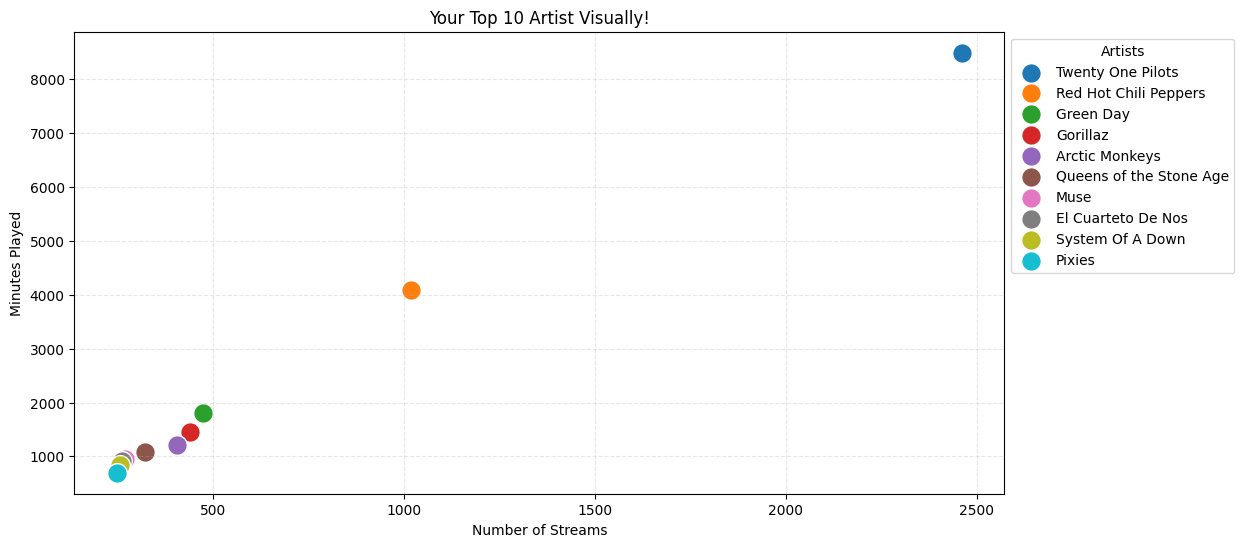


Wow! Your listing stats shows who you really are:
You listened to 48940.76 minutes. That means 33.99 days!

Wanna know about your skips?
This year, you skipped 9617 songs.

The artists you skipped the most are: 
1. Twenty One Pilots - 802 times skipped.
2. System Of A Down - 414 times skipped.
3. Red Hot Chili Peppers - 367 times skipped.
4. Rx Bandits - 314 times skipped.
5. Muse - 250 times skipped.
6. Arctic Monkeys - 227 times skipped.
7. Gorillaz - 216 times skipped.
8. Queens of the Stone Age - 207 times skipped.
9. Linkin Park - 200 times skipped.
10. My Chemical Romance - 194 times skipped.

That does not mean they weren't the ones you wanted to listen the less. 
We actually know who those are!

1. Rx Bandits - 89% of the time skipped
2. Panic! At The Disco - 82% of the time skipped
3. The Neighbourhood - 79% of the time skipped
4. Of Monsters and Men - 79% of the time skipped
5. Balu Brigada - 78% of the time skipped
6. Los Prisioneros - 75% of the time skipped
7. Pierce The 

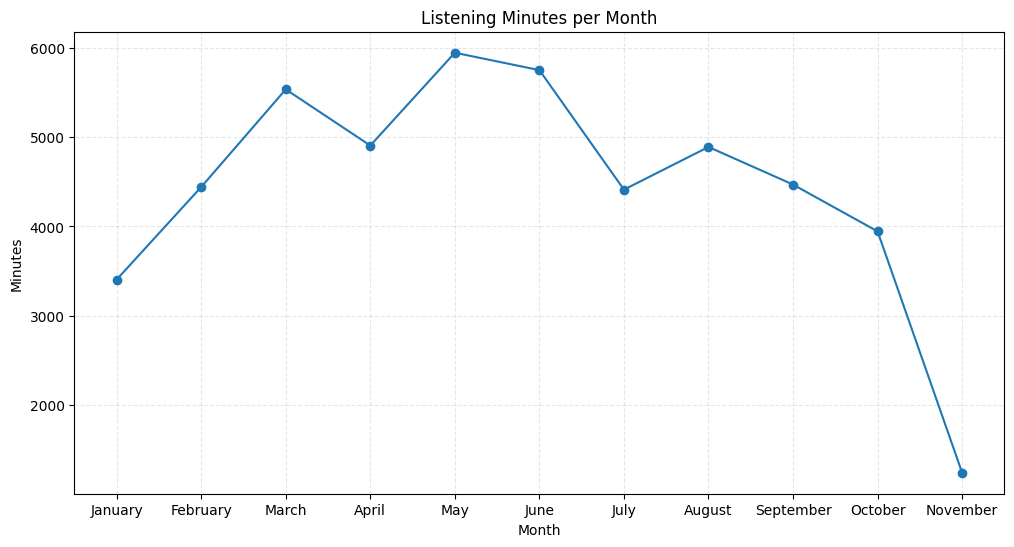


When you look at this graph, do you remeber when were your bussiest months?


Also, this shows how many times you streamed your favorite artists' songs throughout the months:



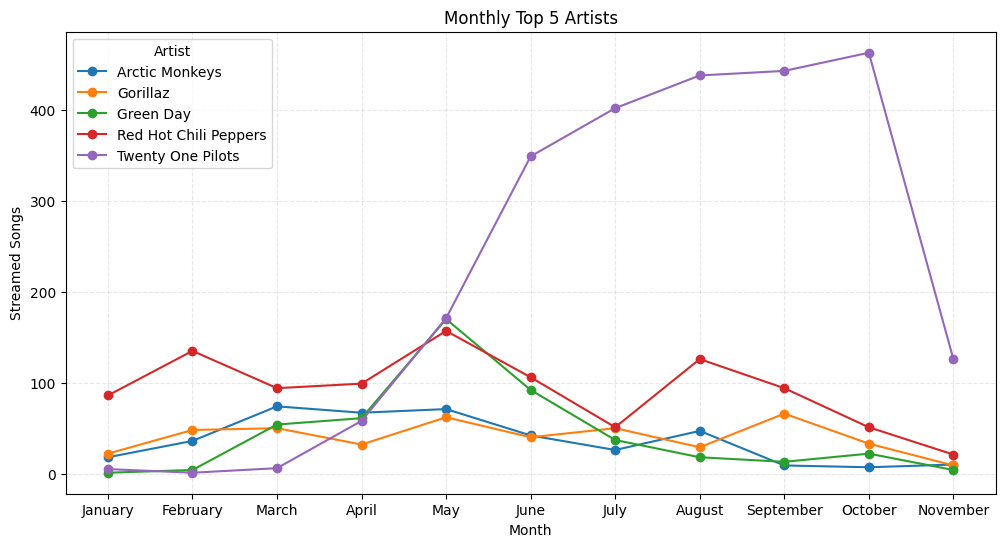


But not only your artists changed over, you also did
We collected your song obssession every month: 

January: Take Me to the Beach (feat. Ado) by Imagine Dragons (15 streams)
February: Enamorado tuyo by El Cuarteto De Nos (20 streams)
March: Evil by Interpol (24 streams)
April: Afterlife (from the Netflix Series "Devil May Cry") by Evanescence (35 streams)
May: She's My Collar (feat. Kali Uchis) by Gorillaz (30 streams)
June: Morph by Twenty One Pilots (24 streams)
July: Migraine by Twenty One Pilots (31 streams)
August: Shy Away by Twenty One Pilots (33 streams)
September: Coffee & TV by Blur (22 streams)
October: Coffee & TV by Blur (27 streams)
November: Coffee & TV by Blur (8 streams)

Does this bring memories back?

Do you want an interesting fact?

You are a Night (18 pm - 23 pm) person. You listened 219 hours in this time period.
And you are definetly not a Early Morning (5 am - 8 am) listener. You only played 14 hours across this time

Take a look for yourself!



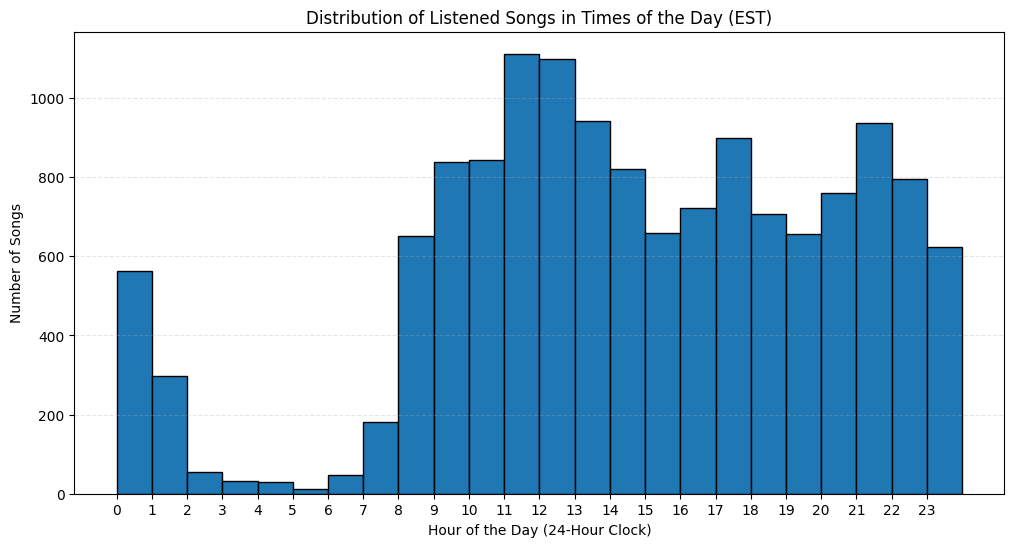


We also got to know your weekly activity. Does it surprise you as it surprised us?



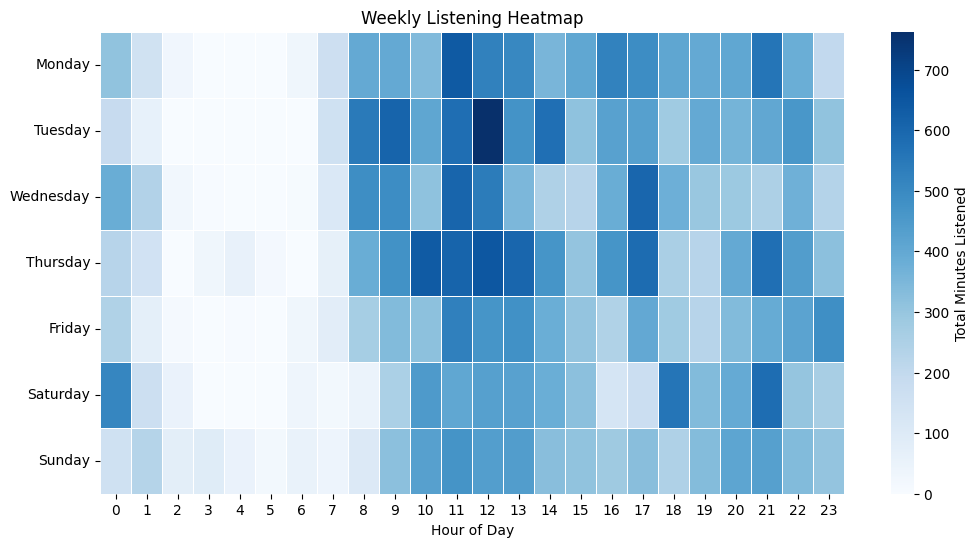

That was all of Wrapped 2025. We hope you keep your headphones up for next year as well!


In [21]:
#Prediction of Wrapped as a rigth now:

print("Hey! Welcome to your Spotify Wrapped 2025")
print("\nFirst of all, here are your most played songs this year: ")

for rank, (song_name, count) in enumerate(most_streamed_songs.items(), start=1):
    print(f"{rank}. {song_name} - played {count} times")

print("\nHere are your most listened artists: ")

for rank, artist_name in enumerate(most_streamed_artist.index, start=1):
  print(f'{rank}. {artist_name}')
print()
print("Want a different point of view?\n")
display(scatter_plt)

print("\nWow! Your listing stats shows who you really are:")
print(f"You listened to {streamed_time:.2f} minutes. That means {streamed_time/60/24:.2f} days!")

print("\nWanna know about your skips?")
print(f'This year, you skipped {number_of_skips} songs.')

print(f'\nThe artists you skipped the most are: ')

for rank, (artists_skips, skips_count) in enumerate(most_skips.items(), start=1):
  print(f'{rank}. {artists_skips} - {skips_count} times skipped.')

print("\nThat does not mean they weren't the ones you wanted to listen the less. \nWe actually know who those are!\n")
for rank, (artists_skip, percentage) in enumerate(most_skipped_artists.items(), start=1):
  print(f'{rank}. {artists_skip} - {int(percentage)}% of the time skipped')

print("\nOn the other hand, these artists have a place in your hearth! Here are the artists that, when they come up, are unskipeable:\n")
for rank, (artists_skip, percentage) in enumerate(unskippable_artists.items(), start=1):
    print(f'{rank}. {artists_skip} - {int(percentage)}% of the time skipped')

print("\nReady to take a peek at your montly stats?\n")

print("Your minutes listening to music changed month to month, and we know that!\n")

display(line)

print("\nWhen you look at this graph, do you remeber when were your bussiest months?\n")

print("\nAlso, this shows how many times you streamed your favorite artists' songs throughout the months:\n")
display(change_in_artists)


print("\nBut not only your artists changed over, you also did")
print("We collected your song obssession every month: \n")
for index, row in month_song.iterrows():
    print(f"{row['Month']}: {row['trackName']} by {row['artistName']} ({row['msPlayed']} streams)")

print("\nDoes this bring memories back?\n")

print("Do you want an interesting fact?\n")

print(f'You are a {most_listened_time} person. You listened {round(time_of_the_day.loc[most_listened_time]/60)} hours in this time period.')
print(f'And you are definetly not a {least_listened_time} listener. You only played {round(time_of_the_day.loc[least_listened_time]/60)} hours across this time\n')

print("Take a look for yourself!\n")
display(histogram)

print("\nWe also got to know your weekly activity. Does it surprise you as it surprised us?\n")

display(heatmap)

print("That was all of Wrapped 2025. We hope you keep your headphones up for next year as well!")